In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('/home/Machine Learning/week-8/dataset/mobiledataset.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

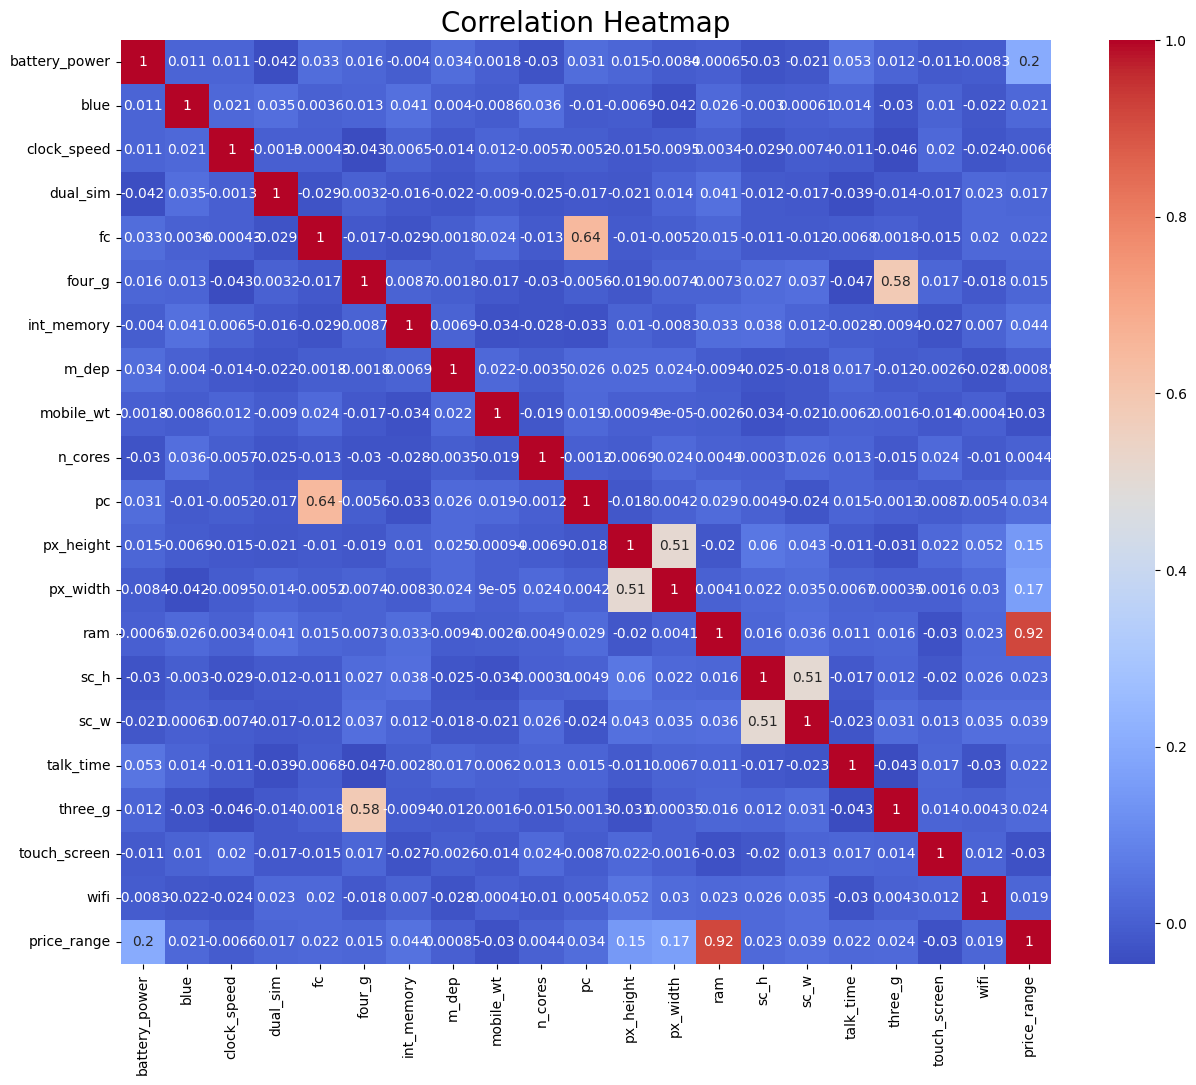

In [8]:
corr = data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, annot=True, cmap='coolwarm')
r.set_title('Correlation Heatmap', fontsize=20)

In [9]:
#corr.sort_values(['price_range'], ascending=False, inplace=True)

AttributeError: 'NoneType' object has no attribute 'sort_values'

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit_transform(X)
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [12]:
y

array([1, 2, 2, ..., 3, 0, 3])

In [13]:
#train data set and test data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


In [21]:
#import svclassifier
from sklearn.svm import svclassifier

y_pred = svclassifier.predict(X_test)

ImportError: cannot import name 'svclassifier' from 'sklearn.svm' (/opt/conda/envs/conda-env-movie/lib/python3.9/site-packages/sklearn/svm/__init__.py)

In [18]:
#accuracy score
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

NameError: name 'y_pred' is not defined